In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Mount Google Drive to persist dataset across sessions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Performance Predictor/student_data.csv')

In [5]:
# Set data path to your Google Drive
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Student Performance Predictor/student_data.csv"
save_dir = "/content/drive/MyDrive/Colab Notebooks/Student Performance Predictor"
os.makedirs(save_dir, exist_ok=True)

In [6]:
# Encode categorical variables
le = LabelEncoder()
df['internet'] = le.fit_transform(df['internet'])  # yes=1, no=0
df['romantic'] = le.fit_transform(df['romantic'])  # yes=1, no=0

In [7]:
# Define features and target
X = df.drop("G3", axis=1)
y = df["G3"]

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("--- Linear Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

--- Linear Regression ---
MSE: 0.14237211407876849
R²: 0.43051154368492606


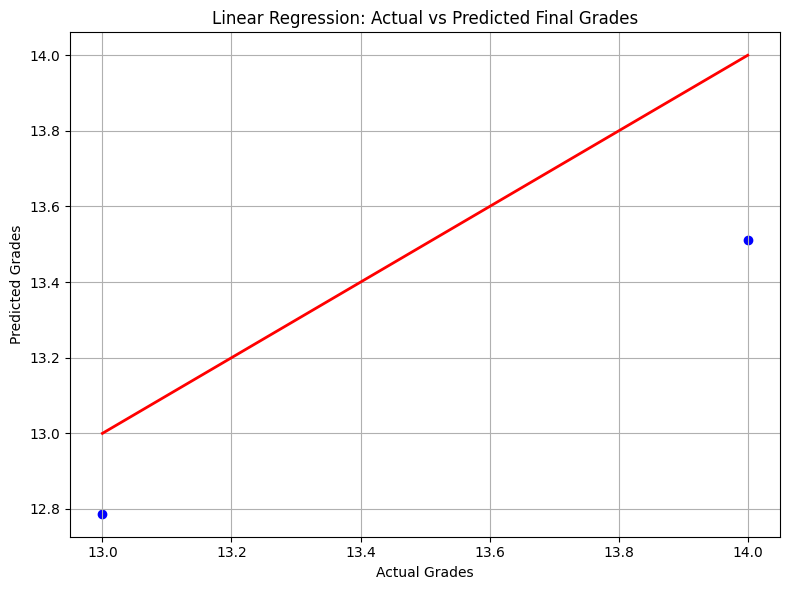

In [10]:
# Plot Linear Regression predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Linear Regression: Actual vs Predicted Final Grades")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# --- Random Forest with GridSearch ---
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=1)

In [12]:
# Best model
y_pred_rf = grid_search.best_estimator_.predict(X_test)

print("\n--- Random Forest Regressor ---")
print("Best Params:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


--- Random Forest Regressor ---
Best Params: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 50}
R² Score: -1.1674547777777708
MSE: 0.5418636944444427


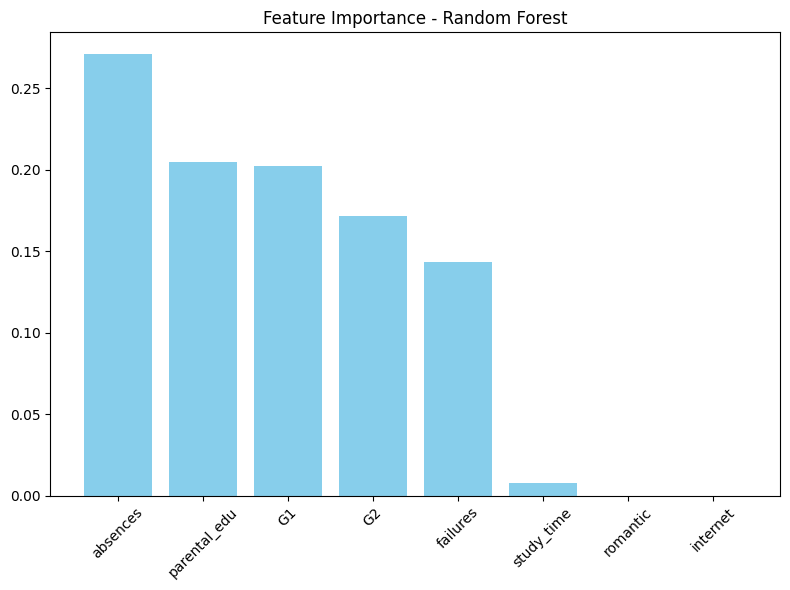

In [13]:
# Plot Feature Importances
features = X.columns
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig(f"{save_dir}/feature_importance_plot.png")
plt.show()